# Xây dựng mô hình dự đoán khách hàng rời mạng viến thông

Giữ chân khách hàng là yếu tố then chốt cho sự thành công của một công ty, đặc biệt trong một ngành cạnh tranh như dịch vụ viễn thông. Thu hút khách hàng mới không chỉ khó khăn hơn mà còn tốn kém hơn nhiều so với việc duy trì mối quan hệ với khách hàng hiện tại. Trong dự án này, chúng tôi sẽ dự đoán khách hàng có ý định rời bỏ dịch vụ tại một công ty cung cấp dịch vụ viễn thông. Trước tiên, chúng tôi sẽ sử dụng phân tích dữ liệu thăm dò để hiểu các mối quan hệ giữa các đặc điểm và biến mục tiêu, và xác định các yếu tố có ảnh hưởng trong việc dự đoán sự rời bỏ của khách hàng. Sử dụng những đặc điểm này, chúng tôi sẽ phát triển một mô hình dự đoán để giúp công ty giảm tỷ lệ rời bỏ một cách chủ động và sử dụng những thông tin từ mô hình để củng cố các chiến lược giữ chân khách hàng.

## 1. Import thư viện

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Load dữ liệu

In [51]:
train_data = pd.read_csv('telecom_train.csv')
train_df = pd.DataFrame(data=train_data)

test_data = pd.read_csv('telecom_test.csv')
test_df = pd.DataFrame(data=test_data)

In [52]:
# show first 5 rows
pd.set_option('display.max_columns', None)
train_df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## 3. Phân tích dữ liệu


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5500 non-null   object 
 1   Gender                             5500 non-null   object 
 2   Age                                5500 non-null   int64  
 3   Married                            5500 non-null   object 
 4   Number of Dependents               5500 non-null   int64  
 5   City                               5500 non-null   object 
 6   Zip Code                           5500 non-null   int64  
 7   Latitude                           5500 non-null   float64
 8   Longitude                          5500 non-null   float64
 9   Number of Referrals                5500 non-null   int64  
 10  Tenure in Months                   5500 non-null   int64  
 11  Offer                              2472 non-null   objec

Dữ liệu từ tập training bao gồm 5500 bản ghi với 38 thuộc tính được chia thành hai loại: dữ liệu nhân khẩu học của khách hàng và thông tin liên quan đến dịch vụ viễn thông của họ. Các đặc điểm nhân khẩu học bao gồm giới tính, tình trạng hôn nhân, số người phụ thuộc, và tuổi tác của khách hàng. Các đặc điểm liên quan đến thông tin tài khoản bao gồm thời gian khách hàng đã gắn bó với dịch vụ, chi phí hàng tháng và tổng chi phí, loại hợp đồng (theo tháng, một năm, hoặc hai năm), và loại dịch vụ điện thoại, internet, TV. Biến mục tiêu của chúng tôi cho nghiên cứu này là tình trạng khách hàng, một biến phân loại biểu thị liệu khách hàng ở lại hay đã rời dịch vụ.


In [54]:
train_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3028
Phone Service                           0
Avg Monthly Long Distance Charges     526
Multiple Lines                        526
Internet Service                        0
Internet Type                        1194
Avg Monthly GB Download              1194
Online Security                      1194
Online Backup                        1194
Device Protection Plan               1194
Premium Tech Support                 1194
Streaming TV                         1194
Streaming Movies                  

In [55]:
train_df.value_counts('Customer Status')

Customer Status
Stayed     3663
Churned    1482
Joined      355
Name: count, dtype: int64

Số liệu cho thấy có 3663 người tiếp tục sử dụng dịch vụ, 1482 người đã ngừng sử dụng, và 355 người mới tham gia. Tỷ lệ giữ chân khách hàng khá tốt, với số người ở lại cao hơn đáng kể so với số người rời đi. Tuy nhiên, số lượng khách hàng mới còn thấp, chỉ bằng khoảng 1/4 số người rời đi.

### Phân tích đơn biến

In [56]:
desc_df = train_df.describe(include=[object])
desc_df = desc_df.drop(columns=['Customer ID'])
desc_df

,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
count,5500,5500,5500,2472,5500,4974,5500,4306,4306,4306,4306,4306,4306,4306,4306,4306,5500,5500,5500,5500,1482,1482
unique,2,2,1102,5,2,2,2,3,2,2,2,2,2,2,2,2,3,2,3,3,5,20
top,Male,No,San Diego,Offer B,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,Competitor,Competitor had better devices
freq,2792,2810,221,650,4974,2665,4306,2386,2758,2400,2420,2718,2184,2172,2371,3709,2828,3261,3075,3663,656,251


In [57]:
train_df.describe(include=[np.number])


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,4974.000000,4306.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,46.512909,0.470727,93496.518364,36.215866,-119.767786,1.952000,32.263091,25.517214,26.221087,63.640282,2273.396062,1.834020,6.829091,749.343147,3027.734280
std,16.765165,0.963820,1852.150700,2.473192,2.157951,2.989505,24.551308,14.272308,19.650616,31.265938,2265.267074,7.643498,24.981169,845.685062,2864.034779
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.400000
25%,32.000000,0.000000,92105.750000,33.994638,-121.809955,0.000000,9.000000,13.162500,12.000000,30.337500,384.875000,0.000000,0.000000,67.870000,593.162500
50%,46.000000,0.000000,93522.500000,36.245926,-119.636676,0.000000,29.000000,25.620000,21.000000,70.100000,1391.950000,0.000000,0.000000,403.550000,2105.870000
75%,60.000000,0.000000,95329.250000,38.169605,-117.980524,3.000000,55.000000,38.050000,30.000000,89.800000,3779.737500,0.000000,0.000000,1187.430000,4784.470000
max,80.000000,9.000000,96148.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Zip Code'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Number of Referrals'}>,
        <Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>],
       [<Axes: title={'center': 'Avg Monthly GB Download'}>,
        <Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Refunds'}>],
       [<Axes: title={'center': 'Total Extra Data Charges'}>,
        <Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

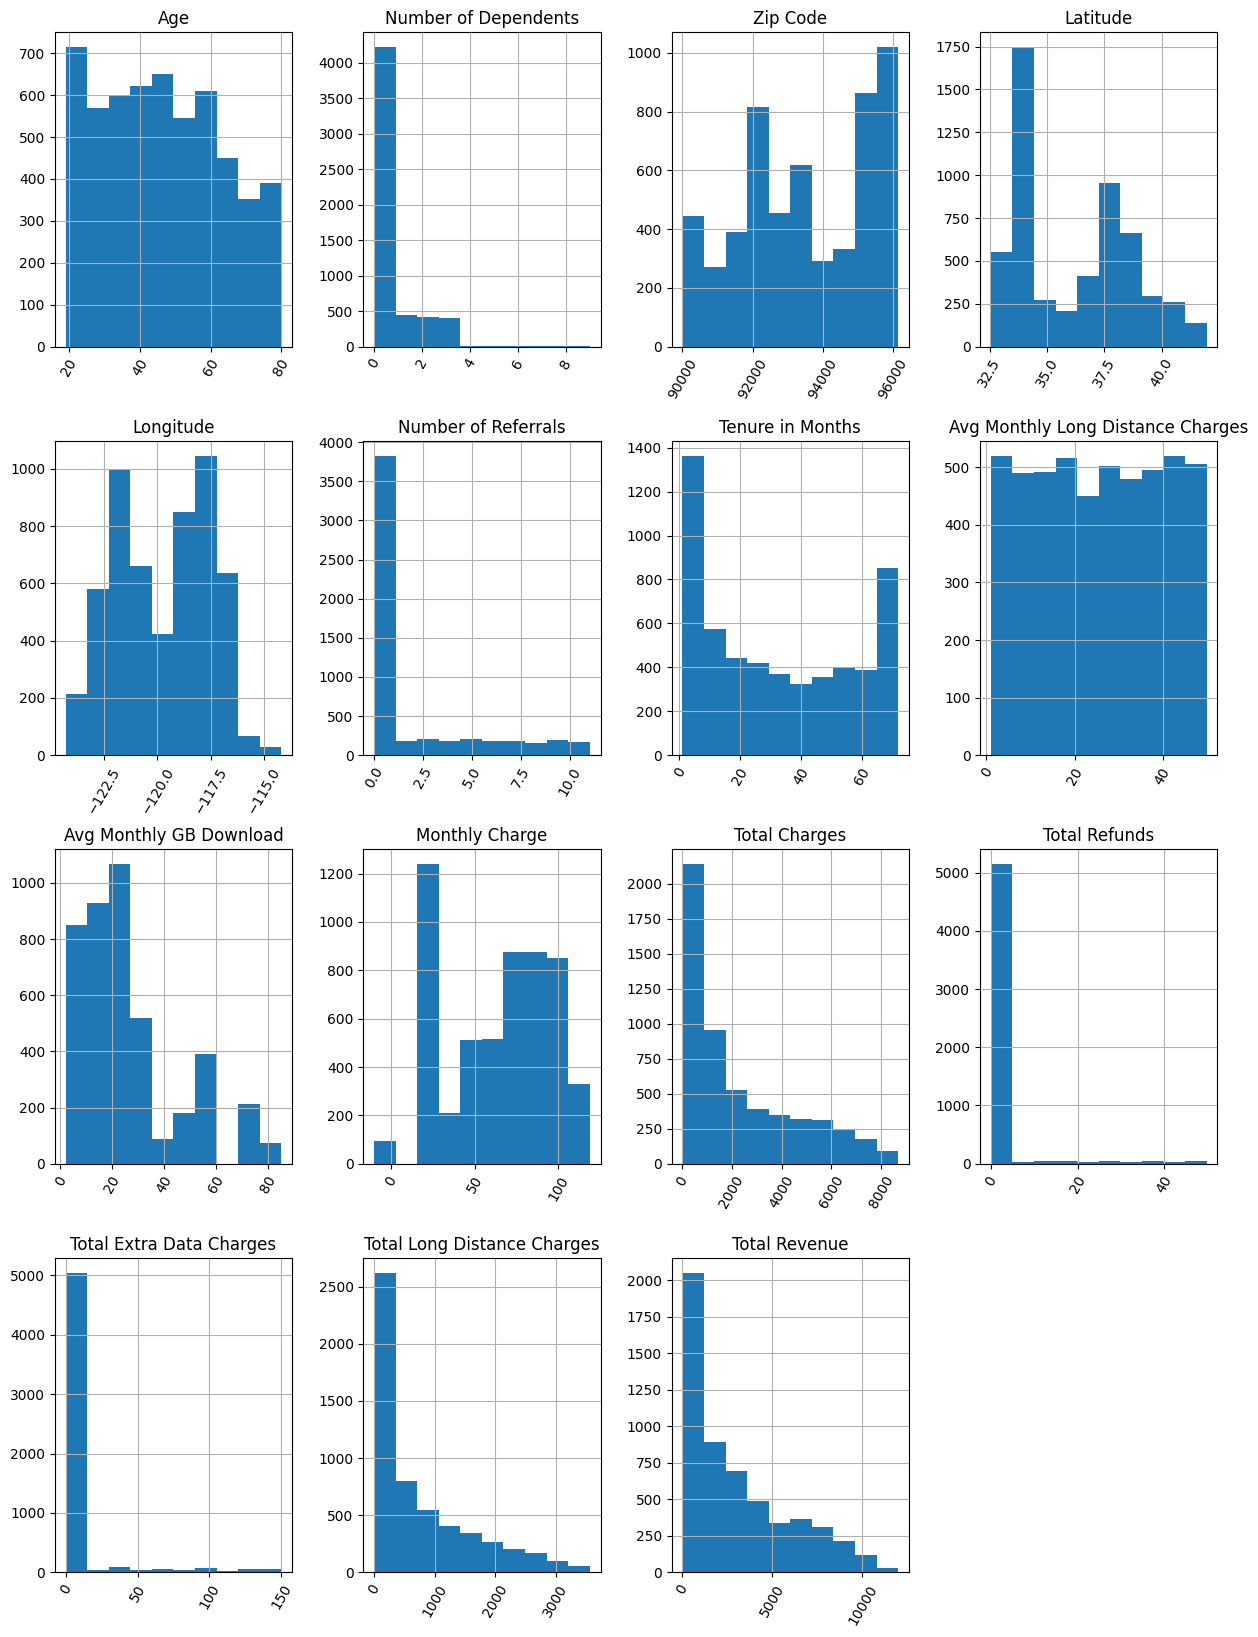

In [58]:
train_df.hist(figsize=(15, 20), xrot=60)

Đồ thị này cung cấp một cái nhìn tổng quan về nhiều khía cạnh của dữ liệu khách hàng. Phân bố độ tuổi khá đều, với số lượng cao nhất ở nhóm 20-25. Đa số khách hàng không có người phụ thuộc. Số lượng giới thiệu thấp, với đa số khách hàng không giới thiệu ai. Thời gian sử dụng dịch vụ đa dạng, phần lớn khách hàng dùng từ 0 đến 20 tháng. Phí hàng tháng tập trung ở mức trung bình (phần đông trả 20 đến 25$ một tháng). Tổng chi phí càng cao thì số lượng khác hàng càng giảm. Phí dữ liệu phụ trội và cước gọi đường dài chủ yếu ở mức thấp với hầu hết khách hàng.

### Phân tích đa biến

In [59]:
# encode customer status
class_dict = {'Stayed': 0, 'Churned': 1, 'Joined': 0}
train_df = train_df.replace({'Customer Status': class_dict})
test_df = test_df.replace({'Customer Status': class_dict})

/var/folders/y9/m40hlc6x15lfjy_pyh828dbc0000gn/T/ipykernel_4648/1536720470.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df = train_df.replace({'Customer Status': class_dict})
/var/folders/y9/m40hlc6x15lfjy_pyh828dbc0000gn/T/ipykernel_4648/1536720470.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df = test_df.replace({'Customer Status': class_dict})


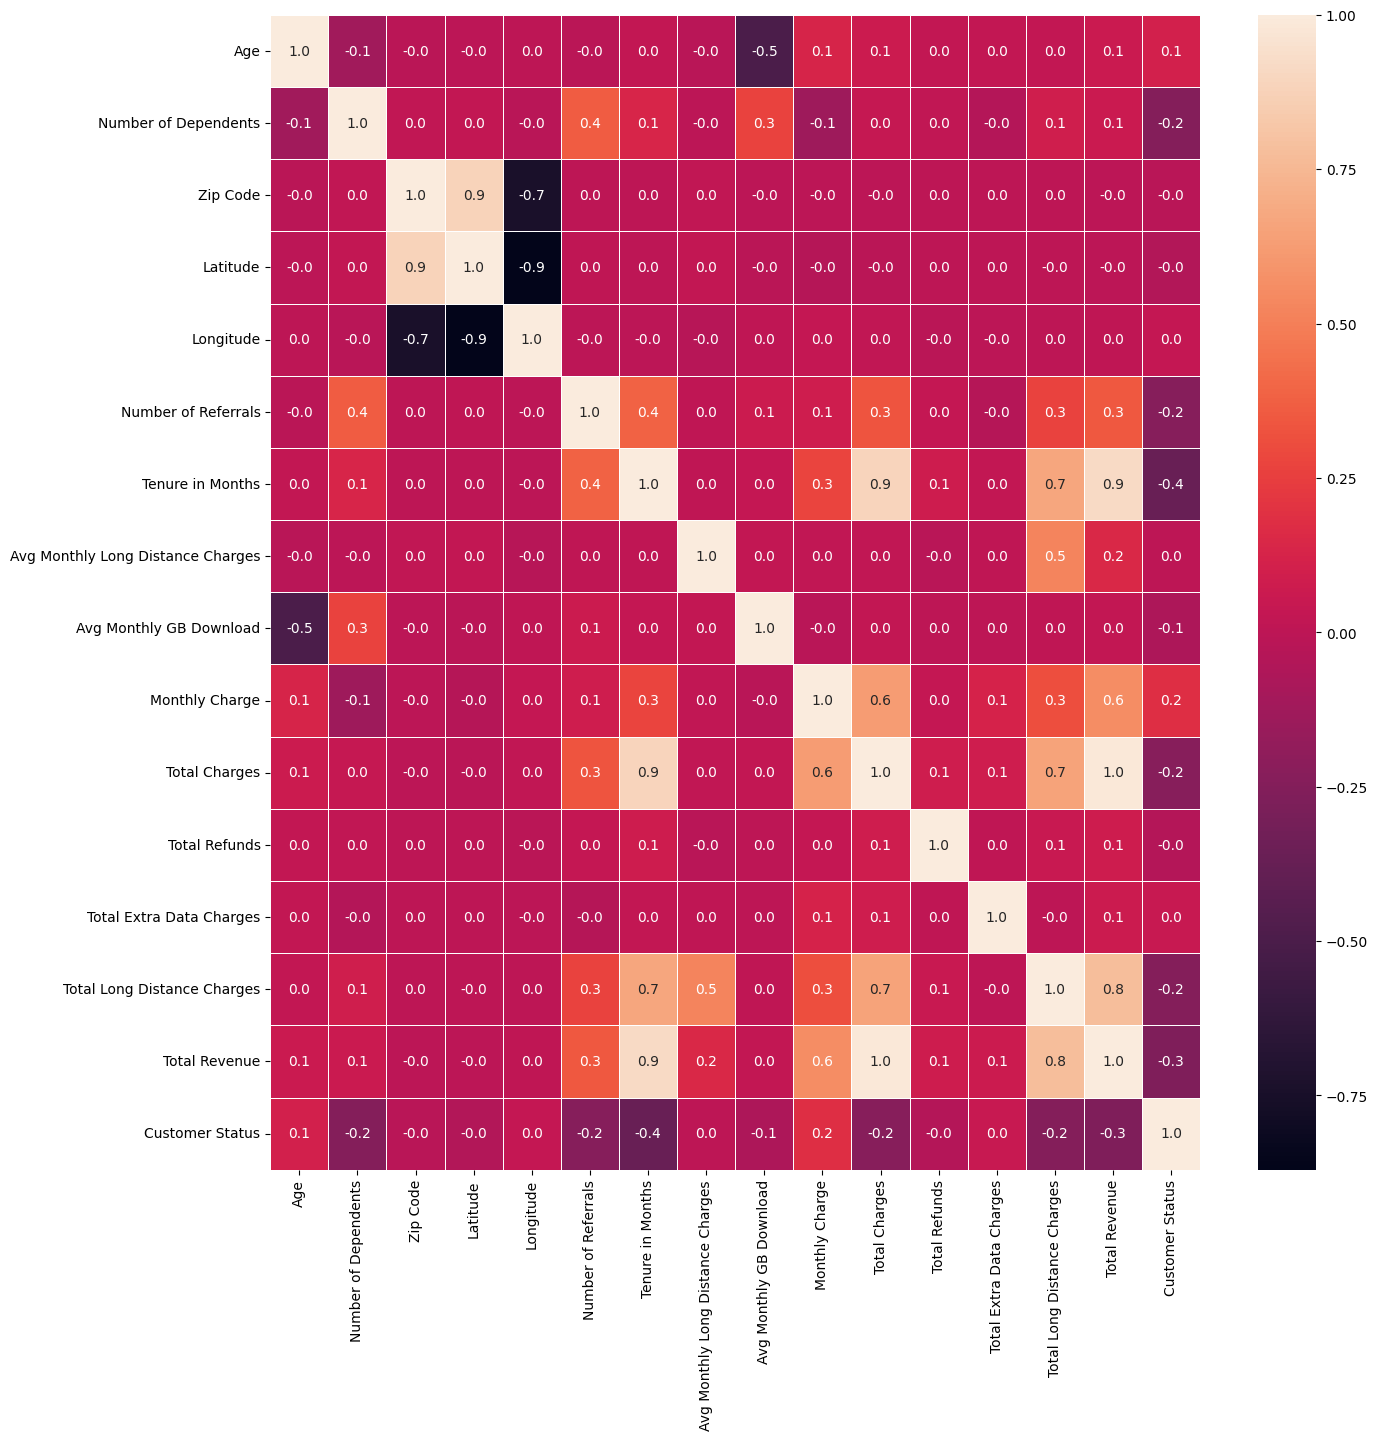

In [60]:
numeric_train_df = train_df.select_dtypes(include=[np.number])
fig, ax = plt.subplots(figsize=(15, 15))
axes = sns.heatmap(numeric_train_df.corr('spearman'), annot=True, ax=ax, linewidths=.5, fmt='.1f', cmap='rocket')

Tổng doanh thu có tương quan mạnh với tổng chi phí, thời gian sử dụng dịch vụ và cước gọi đường dài. Mã bưu điện, vĩ độ và kinh độ có mối liên hệ chặt chẽ, phản ánh vị trí địa lý. Thời gian sử dụng dịch vụ ảnh hưởng tích cực đến nhiều yếu tố như số lượng giới thiệu, chi phí hàng tháng và tổng chi phí. Thời gian ở lại tương quan âm với tình trạng khách hàng, chỉ ra rằng khách hàng càng có thâm niên thì càng ít có khả năng rời mạng.

### Trực quan hoá các thuộc tính có liên quan đến khả năng rời bỏ dịch vụ

<Axes: xlabel='Monthly Charge', ylabel='Total Charges'>

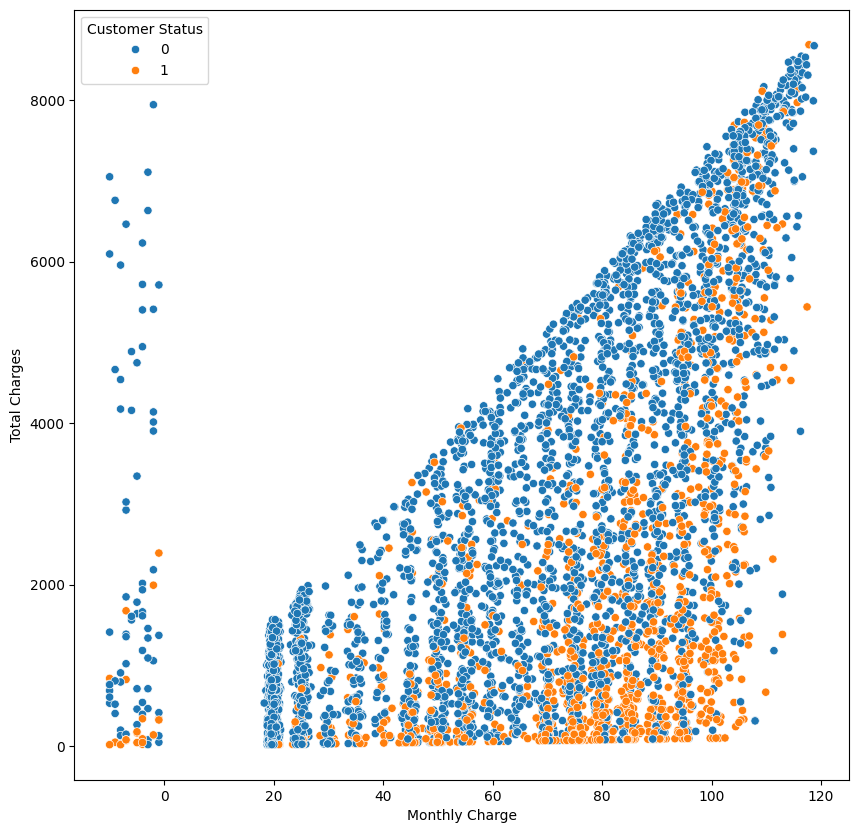

In [61]:
# scatterplot of total charge vs. monthly charge (with labels)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=train_df, x='Monthly Charge', y='Total Charges', hue='Customer Status')

Khách hàng rời đi (màu cam) có xu hướng tập trung nhiều hơn ở vùng có phí hàng tháng cao hơn, đặc biệt là trong khoảng từ 60 đến 120. Khách hàng ở lại (màu xanh) phân bố đều hơn trên toàn bộ phạm vi phí hàng tháng, nhưng có vẻ chiếm ưu thế ở vùng phí thấp và trung bình. Tỷ lệ khách hàng rời đi có vẻ tăng lên khi phí hàng tháng tăng, thể hiện qua mật độ điểm màu cam cao hơn ở phía phải đồ thị.

<Axes: xlabel='Tenure in Months', ylabel='Total Charges'>

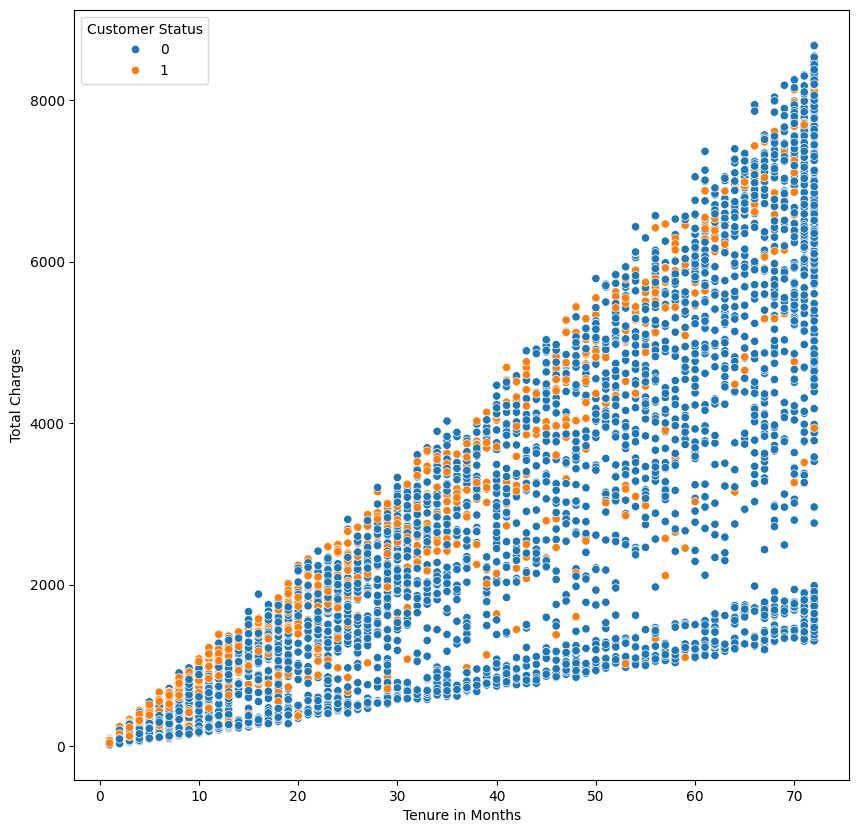

In [73]:
# scatter plot of tenure vs. total charges
plt.figure(figsize=(10, 10))
sns.scatterplot(data=train_df, x='Tenure in Months', y='Total Charges', hue='Customer Status')

Khách hàng ở lại (màu xanh) có xu hướng phân bố rộng hơn trên toàn bộ biểu đồ, cho thấy sự đa dạng trong thời gian gắn bó và tổng chi phí. Ngược lại, khách hàng rời đi (màu cam) tập trung nhiều hơn ở vùng có thời gian gắn bó ngắn hơn và tổng chi phí thấp hơn. Đáng chú ý là có một số nhóm điểm dữ liệu song song, cho thấy có thể có các gói dịch vụ hoặc mức giá khác nhau. Nhìn chung, khách hàng có thời gian gắn bó càng lâu thì tổng chi phí càng cao, nhưng nguy cơ rời đi có vẻ cao hơn trong giai đoạn đầu của dịch vụ.

<Figure size 1000x1000 with 0 Axes>

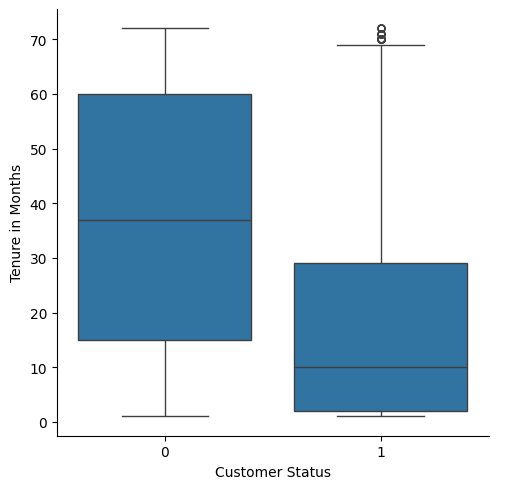

In [71]:
# boxplot of customer status vs. tenure
plt.figure(figsize=(10, 10))
sns.catplot(data=train_df, x='Customer Status', y='Tenure in Months', kind='box')

Khách hàng ở lại có thời gian gắn bó trung bình cao hơn (khoảng 37 tháng) và phạm vi rộng hơn (từ 15 đến 60 tháng). Ngược lại, khách hàng rời đi có thời gian gắn bó trung bình ngắn hơn nhiều (khoảng 10 tháng) và tập trung chủ yếu trong khoảng 3 đến 30 tháng. Điều này cho thấy khách hàng có khả năng rời đi cao nhất trong những tháng đầu. Tuy nhiên, vẫn có một số khách hàng rời đi sau thời gian dài gắn bó (thể hiện qua các điểm ngoại lệ).

<Figure size 1000x1000 with 0 Axes>

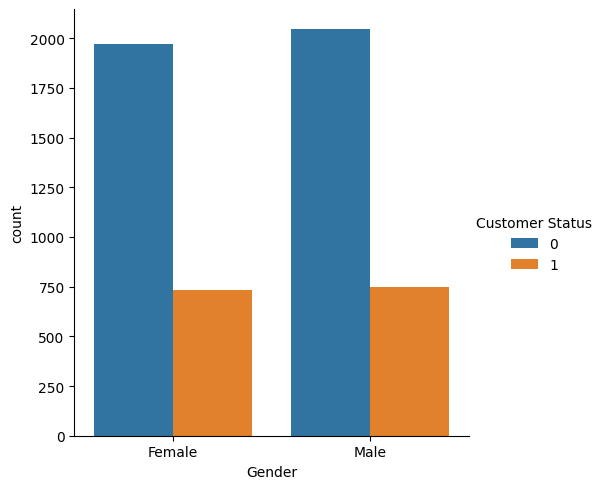

In [75]:
# barplot of gender vs count of customer status
plt.figure(figsize=(10, 10))
sns.catplot(data=train_df, x='Gender', hue='Customer Status', kind='count')

Số lượng khách hàng nam và nữ khá cân bằng, với nam giới có chút ít nhiều hơn. Tỷ lệ khách hàng rời đi so với ở lại cũng tương đối đồng đều giữa hai giới.

<Figure size 1000x1000 with 0 Axes>

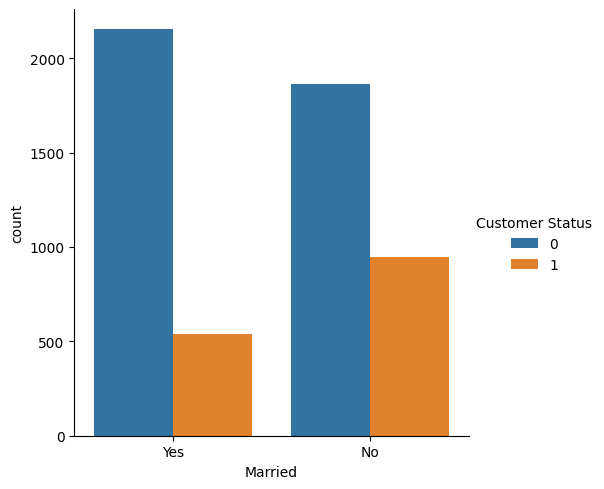

In [76]:
# barplot of married vs count of customer status
plt.figure(figsize=(10, 10))
sns.catplot(data=train_df, x='Married', hue='Customer Status', kind='count')

Đối với khách hàng đã kết hôn, số lượng khách hàng ở lại (màu xanh) cao hơn đáng kể so với khách hàng rời đi (màu cam). Tuy nhiên, đối với khách hàng chưa kết hôn, sự chênh lệch này ít rõ rệt hơn, với tỷ lệ khách hàng rời đi cao hơn. Điều này gợi ý rằng khách hàng đã kết hôn có xu hướng trung thành hơn với dịch vụ. 

<Figure size 1000x1000 with 0 Axes>

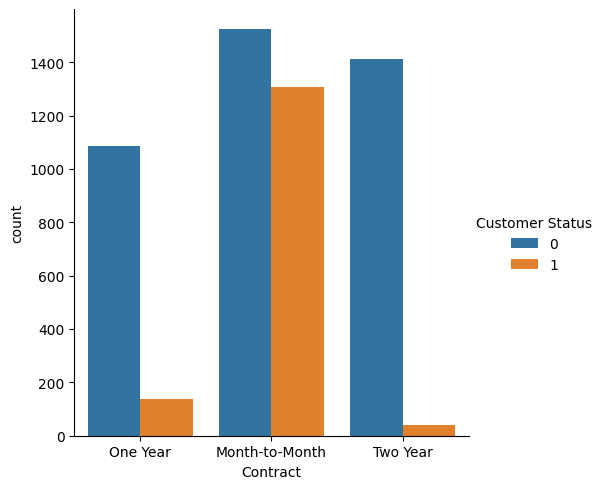

In [79]:
# barplot of contact vs count of customer status
plt.figure(figsize=(10, 10))
sns.catplot(data=train_df, x='Contract', hue='Customer Status', kind='count')

Đối với hợp đồng Month-to-Month, tỷ lệ khách hàng rời đi (màu cam) cao nhất và gần bằng số khách hàng ở lại (màu xanh), cho thấy đây là nhóm có nguy cơ mất khách hàng cao nhất. Ngược lại, hợp đồng One Year và Two Year có tỷ lệ khách hàng ở lại rất cao, đặc biệt là Two Year gần như không có khách hàng rời đi. Điều này chỉ ra rằng các hợp đồng dài hạn hiệu quả hơn trong việc giữ chân khách hàng.

<Figure size 1000x1000 with 0 Axes>

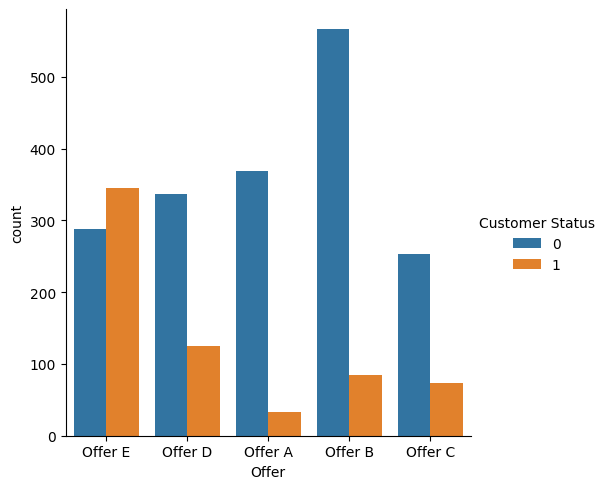

In [82]:
# barplot of offer vs count of customer status
plt.figure(figsize=(10, 10))
sns.catplot(data=train_df, x='Offer', hue='Customer Status', kind='count')

Biểu đồ cột này so sánh số lượng khách hàng theo các loại ưu đãi (Offer) khác nhau. Offer B có số lượng khách hàng ở lại (màu xanh) cao nhất và tỷ lệ khách hàng rời đi thấp, cho thấy đây là ưu đãi hiệu quả nhất trong việc giữ chân khách hàng. Ngược lại, Offer E có số lượng khách hàng rời đi (màu cam) cao hơn số khách hàng ở lại, chỉ ra rằng đây là ưu đãi kém hiệu quả nhất. Offer A, C và D có tỷ lệ giữ chân khách hàng tốt, với số lượng khách hàng ở lại vượt trội so với số rời đi